In [1]:
# Low Pass SPatial Domain Filtering 
# to observe the blurring effect 

import cv2 
import numpy as np 
from matplotlib import pyplot as plt

def avgFilter(img):

    # Obtain number of rows and columns 
    # of the image 
    m, n = img.shape 

    # Develop Averaging filter(3, 3) mask 
    mask = np.ones([3, 3], dtype = int) 
    mask = mask / 9

    # Convolve the 3X3 mask over the image 
    img_new = np.zeros([m, n]) 

    for i in range(1, m-1): 
        for j in range(1, n-1): 
            temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2] 

            img_new[i, j]= temp 

    img_new = img_new.astype(np.uint8) 
    #cv2.imshow('image', img_new)
    #cv2.waitKey(0) 
    #cv2.destroyAllWindows()

    f = plt.figure()
    f.add_subplot(1,2, 1)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('before blurring')
    #plt.show()

    f.add_subplot(1,2, 2)


    plt.imshow(cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB))
    plt.title('after blurring')
    #plt.show()
    plt.show(block=True)

In [2]:
# Median Spatial Domain Filtering 

def medianFilter(img_noisy1):

    # Obtain the number of rows and columns 
    # of the image 
    m, n = img_noisy1.shape 

    # Traverse the image. For every 3X3 area, 
    # find the median of the pixels and 
    # replace the center pixel by the median 
    img_new1 = np.zeros([m, n]) 

    for i in range(1, m-1): 
        for j in range(1, n-1): 
            temp = [img_noisy1[i-1, j-1], 
                img_noisy1[i-1, j], 
                img_noisy1[i-1, j + 1], 
                img_noisy1[i, j-1], 
                img_noisy1[i, j], 
                img_noisy1[i, j + 1], 
                img_noisy1[i + 1, j-1], 
                img_noisy1[i + 1, j], 
                img_noisy1[i + 1, j + 1]] 

            temp = sorted(temp) 
            img_new1[i, j]= temp[4] 

    img_new1 = img_new1.astype(np.uint8) 
    
    f = plt.figure()
    f.add_subplot(1,2, 1)

    plt.imshow(cv2.cvtColor(img_noisy1, cv2.COLOR_BGR2RGB))
    plt.title('before median filter')

    f.add_subplot(1,2, 2)


    plt.imshow(cv2.cvtColor(img_new1, cv2.COLOR_BGR2RGB))
    plt.title('after median filter')
    plt.show(block=True)


In [3]:
def edgeDetectionSobelMask(img, maskOption):

    # Obtain number of rows and columns 
    # of the image 
    m, n = img.shape 


    # Develop Averaging filter(3, 3) mask
    if maskOption == 1:
        # Develop Averaging filter(3, 3) mask 
        mask = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype = int)
    elif maskOption == 2:
        mask = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype = int)
    elif maskOption == 3:
        mask = np.array([[2,1,0],[1,0,-1],[0,-1,-2]], dtype = int)
    elif maskOption == 4:
        mask = np.array([[0,-1,-2],[1,0,-1],[2,1,0]], dtype = int)

    # Convolve the 3X3 mask over the image 
    img_new = np.zeros([m, n]) 

    for i in range(1, m-1): 
        for j in range(1, n-1): 
            temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2] 

            img_new[i, j]= temp 

    img_new = img_new.astype(np.uint8) 
    #cv2.imshow('image', img_new)
    #cv2.waitKey(0) 
    #cv2.destroyAllWindows()

    f = plt.figure()
    f.add_subplot(1,2, 1)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('before Sobel mask')
    #plt.show()

    f.add_subplot(1,2, 2)


    plt.imshow(cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB))
    plt.title('after Sobel mask')
    #plt.show()
    plt.show(block=True)

In [4]:
def edgeDetectionRobertMask(img, maskOption):

    # Obtain number of rows and columns 
    # of the image 
    m, n = img.shape 

    # Develop Averaging filter(3, 3) mask
    if maskOption == 1:
        # Develop Averaging filter(3, 3) mask 
        mask = np.array([[0,1,0],[0,0,0],[0,-1,0]], dtype = int)
    elif maskOption == 2:
        mask = np.array([[0,0,0],[1,0,-1],[0,0,0]], dtype = int)
    elif maskOption == 3:
        mask = np.array([[1,0,0],[0,0,0],[0,0,-1]], dtype = int)
    elif maskOption == 4:
        mask = np.array([[0,0,1],[0,0,0],[-1,0,0]], dtype = int)

    # Convolve the 3X3 mask over the image 
    img_new = np.zeros([m, n]) 

    for i in range(1, m-1): 
        for j in range(1, n-1): 
            temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2] 

            img_new[i, j]= temp 

    img_new = img_new.astype(np.uint8) 
    #cv2.imshow('image', img_new)
    #cv2.waitKey(0) 
    #cv2.destroyAllWindows()

    f = plt.figure()
    f.add_subplot(1,2, 1)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('before Robert mask')
    #plt.show()

    f.add_subplot(1,2, 2)


    plt.imshow(cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB))
    plt.title('after Robert mask')
    #plt.show()
    plt.show(block=True)

In [5]:
def shrpeningFilter(img, maskOption):

    # Obtain number of rows and columns 
    # of the image 
    m, n = img.shape 

    if maskOption == 1:
        # Develop Averaging filter(3, 3) mask 
        mask = np.array([[0,1,0],[0,1,0],[0,-1,0]], dtype = int)
    elif maskOption == 2:
        mask = np.array([[0,0,0],[1,1,-1],[0,0,0]], dtype = int)
    elif maskOption == 3:
        mask = np.array([[0,0,1],[0,1,0],[-1,0,0]], dtype = int)
    elif maskOption == 4:
        mask = np.array([[1,0,0],[0,1,0],[0,0,-1]], dtype = int)

    # Convolve the 3X3 mask over the image 
    img_new = np.zeros([m, n]) 

    for i in range(1, m-1): 
        for j in range(1, n-1): 
            temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2] 

            img_new[i, j]= temp 

    img_new = img_new.astype(np.uint8) 
    #cv2.imshow('image', img_new)
    #cv2.waitKey(0) 
    #cv2.destroyAllWindows()

    f = plt.figure()
    f.add_subplot(1,2, 1)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('before Sharpening mask')
    #plt.show()

    f.add_subplot(1,2, 2)


    plt.imshow(cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB))
    plt.title('after Sharpening mask')
    #plt.show()
    plt.show(block=True)

In [6]:
def meanFilter(img):

    # Obtain number of rows and columns 
    # of the image 
    m, n = img.shape 

    # Develop Averaging filter(3, 3) mask 
    mask = np.ones([3, 3], dtype = int) 
    #mask = mask / 9

    # Convolve the 3X3 mask over the image 
    img_new = np.zeros([m, n]) 

    for i in range(1, m-1): 
        for j in range(1, n-1): 
            temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2] 

            img_new[i, j]= temp / 9

    img_new = img_new.astype(np.uint8) 
    #cv2.imshow('image', img_new)
    #cv2.waitKey(0) 
    #cv2.destroyAllWindows()

    f = plt.figure()
    f.add_subplot(1,2, 1)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('before Mean filter')
    #plt.show()

    f.add_subplot(1,2, 2)


    plt.imshow(cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB))
    plt.title('after Mean filter')
    #plt.show()
    plt.show(block=True)

In [7]:
def maxFilter(img):

    # Obtain number of rows and columns 
    # of the image 
    m, n = img.shape 

    # Develop Averaging filter(3, 3) mask 
   # mask = np.ones([3, 3], dtype = int) 
    #mask = mask / 9

    # Convolve the 3X3 mask over the image 
    img_new = np.zeros([m, n]) 

    for i in range(1, m-1): 
        for j in range(1, n-1): 
            temp = np.array([[img[i-1, j-1], img[i-1, j], img[i-1, j + 1]],
            [img[i, j-1], img[i, j], img[i, j + 1]],
            [img[i + 1, j-1], img[i + 1, j], img[i + 1, j + 1]]], dtype = int) 

            img_new[i, j]= temp.max()

    img_new = img_new.astype(np.uint8) 
    #cv2.imshow('image', img_new)
    #cv2.waitKey(0) 
    #cv2.destroyAllWindows()

    f = plt.figure()
    f.add_subplot(1,2, 1)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('before Max filter')
    #plt.show()

    f.add_subplot(1,2, 2)


    plt.imshow(cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB))
    plt.title('after Max filter')
    #plt.show()
    plt.show(block=True)

In [8]:
def minFilter(img):

    # Obtain number of rows and columns 
    # of the image 
    m, n = img.shape 

    # Develop Averaging filter(3, 3) mask 
   # mask = np.ones([3, 3], dtype = int) 
    #mask = mask / 9

    # Convolve the 3X3 mask over the image 
    img_new = np.zeros([m, n]) 

    for i in range(1, m-1): 
        for j in range(1, n-1): 
            temp = np.array([[img[i-1, j-1], img[i-1, j], img[i-1, j + 1]],
            [img[i, j-1], img[i, j], img[i, j + 1]],
            [img[i + 1, j-1], img[i + 1, j], img[i + 1, j + 1]]], dtype = int) 

            img_new[i, j]= temp.min()

    img_new = img_new.astype(np.uint8) 
    #cv2.imshow('image', img_new)
    #cv2.waitKey(0) 
    #cv2.destroyAllWindows()

    f = plt.figure()
    f.add_subplot(1,2, 1)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('before Min filter')
    #plt.show()

    f.add_subplot(1,2, 2)


    plt.imshow(cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB))
    plt.title('after Min filter')
    #plt.show()
    plt.show(block=True)

In [9]:
def midPointFilter(img):

    # Obtain number of rows and columns 
    # of the image 
    m, n = img.shape 

    # Develop Averaging filter(3, 3) mask 
   # mask = np.ones([3, 3], dtype = int) 
    #mask = mask / 9

    # Convolve the 3X3 mask over the image 
    img_new = np.zeros([m, n]) 

    for i in range(1, m-1): 
        for j in range(1, n-1): 
            temp = np.array([[img[i-1, j-1], img[i-1, j], img[i-1, j + 1]],
            [img[i, j-1], img[i, j], img[i, j + 1]],
            [img[i + 1, j-1], img[i + 1, j], img[i + 1, j + 1]]], dtype = int) 

            img_new[i, j]= (temp.max() + temp.max()) / 2

    img_new = img_new.astype(np.uint8) 
    #cv2.imshow('image', img_new)
    #cv2.waitKey(0) 
    #cv2.destroyAllWindows()

    f = plt.figure()
    f.add_subplot(1,2, 1)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('before Mid-Point filter')
    #plt.show()

    f.add_subplot(1,2, 2)


    plt.imshow(cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB))
    plt.title('after Mid-Point filter')
    #plt.show()
    plt.show(block=True)

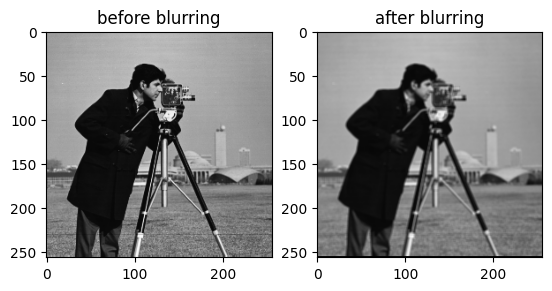

In [11]:

# Read the image 
img = cv2.imread('cameraman.png', 0)
avgFilter(img)


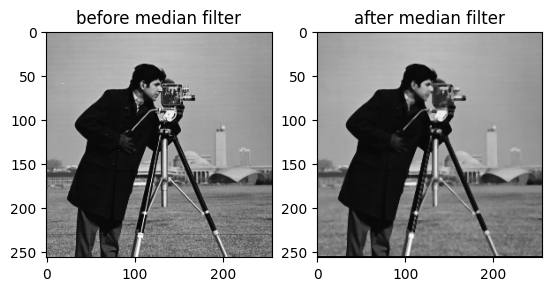

In [13]:

# Read the image 
img_noisy1 = cv2.imread('cameraman.png', 0)
medianFilter(img_noisy1)


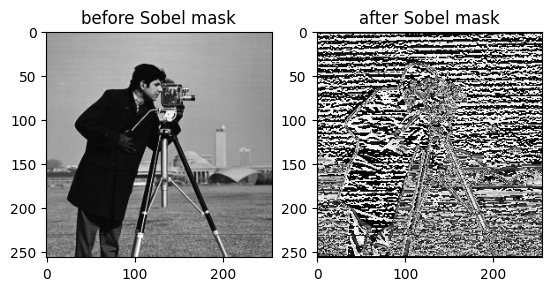

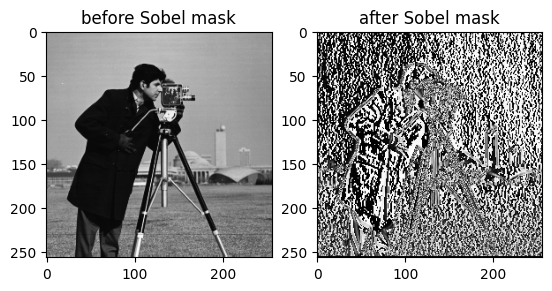

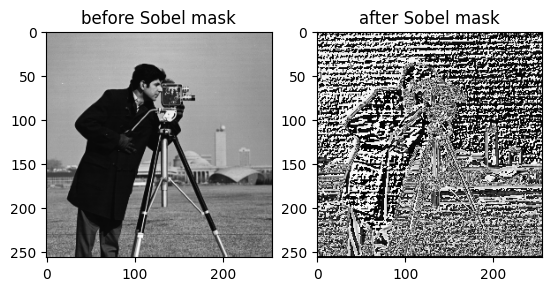

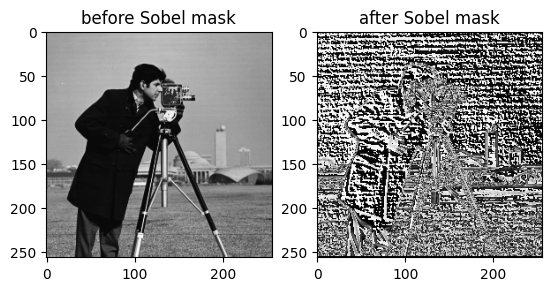

In [14]:

edgeDetectionSobelMask(img, 1)
edgeDetectionSobelMask(img, 2)
edgeDetectionSobelMask(img, 3)
edgeDetectionSobelMask(img, 4)


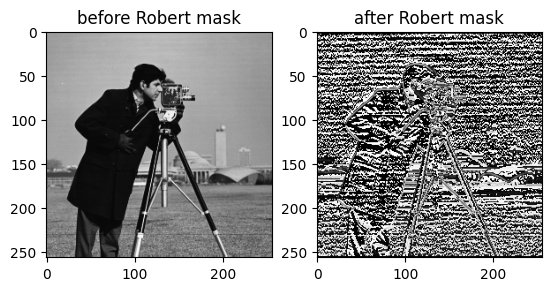

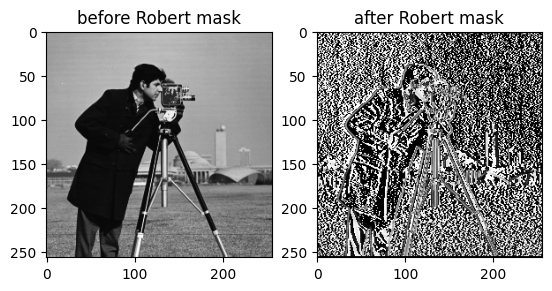

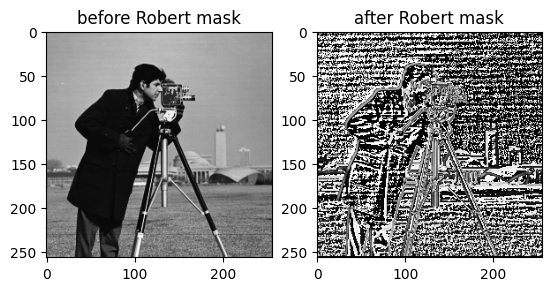

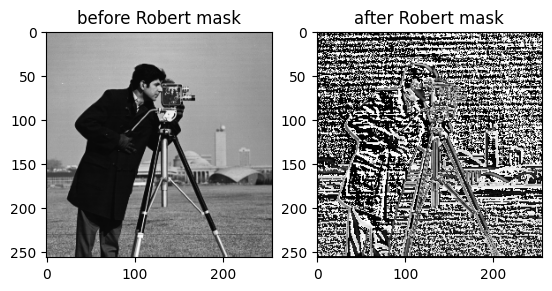

In [15]:

edgeDetectionRobertMask(img, 1)
edgeDetectionRobertMask(img, 2)
edgeDetectionRobertMask(img, 3)
edgeDetectionRobertMask(img, 4)


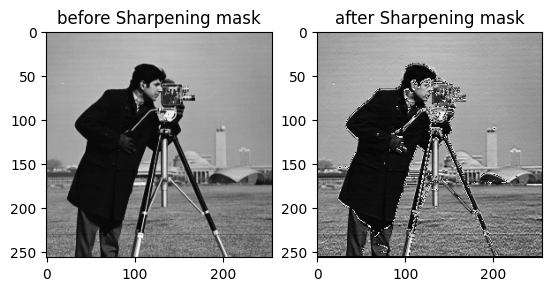

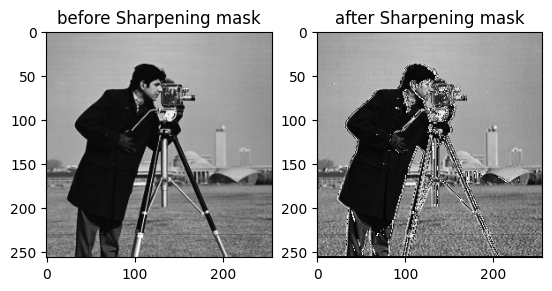

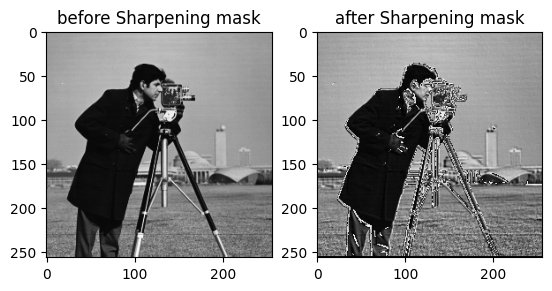

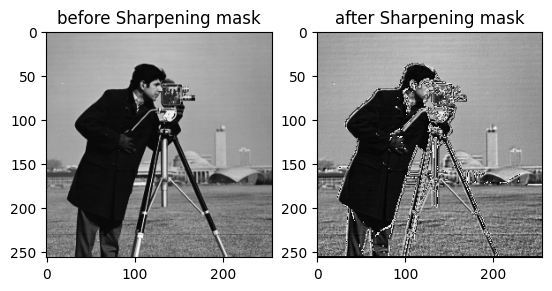

In [16]:

shrpeningFilter(img, 1)
shrpeningFilter(img, 2)
shrpeningFilter(img, 3)
shrpeningFilter(img, 4)


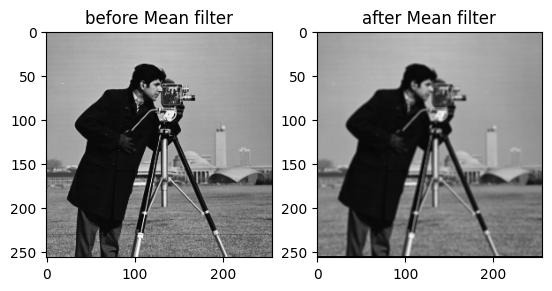

In [17]:

meanFilter(img)


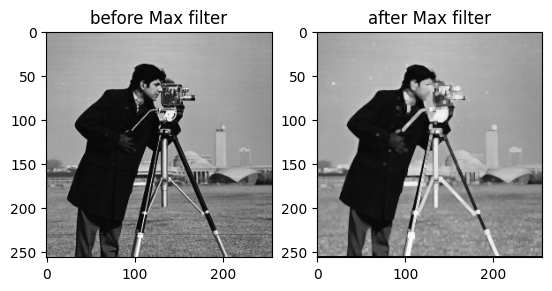

In [18]:

maxFilter(img)


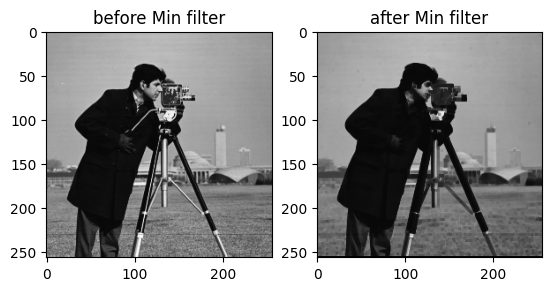

In [19]:

minFilter(img)


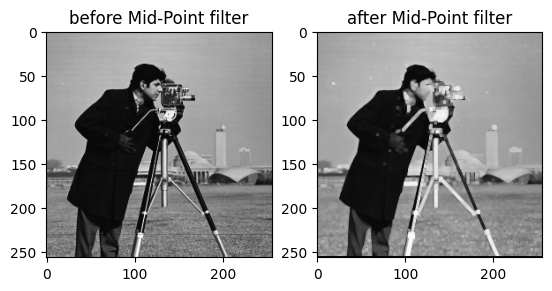

In [20]:

midPointFilter(img)
